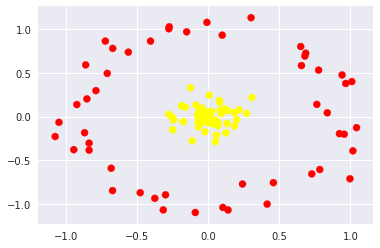

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns;sns.set()
from sklearn.svm import SVC
from sklearn.datasets.samples_generator import make_circles
X,y = make_circles(100,factor=.1,noise=.1)
clf = SVC(kernel='linear').fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')


In [7]:
from ipywidgets import interact,fixed
from mpl_toolkits import mplot3d
r = np.exp(-(X**2).sum(1))
def plot_3D(elev=30,azim=30,X=X,y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:,0],X[:,1],r,c=y,s=50,cmap='autumn')
    ax.view_init(elev=elev,azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

interact(plot_3D,elev=(-90,90),azip=(-180,180),X=fixed(X),y=fixed(y))

interactive(children=(IntSlider(value=30, description='elev', max=90, min=-90), IntSlider(value=30, descriptio…

<function __main__.plot_3D(elev=30, azim=30, X=array([[ 0.81320297, -0.6186371 ],
       [-0.00361263, -0.04896995],
       [ 0.01490904,  0.00480979],
       [ 0.19699223,  0.0467168 ],
       [ 0.10312361, -0.09450153],
       [-0.12192564,  0.1203904 ],
       [-0.02966584,  0.02002013],
       [-0.59875369, -0.8668428 ],
       [ 0.14254912,  0.21272161],
       [-0.0578968 ,  0.14756123],
       [-0.26946118, -1.03901162],
       [ 0.10796348,  0.08422538],
       [-0.13014759,  0.95007995],
       [-0.08262579, -0.04986763],
       [-0.19315287,  0.00922976],
       [ 0.03229916,  0.02855238],
       [ 0.75292782,  0.44812745],
       [ 0.59437744, -0.60903489],
       [-0.94220972, -0.59366718],
       [ 0.1732061 ,  0.09066843],
       [ 0.88188478,  0.54218931],
       [ 1.15676717,  0.08405831],
       [ 0.07194449,  0.27057874],
       [ 0.17219125, -0.03502078],
       [ 1.0965773 , -0.14995099],
       [-0.09779767,  0.04025138],
       [ 0.11762377,  0.21971238],
       [

In [8]:
clf = SVC(kernel='rbf',C=1E6)
clf.fit(X,y)

SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

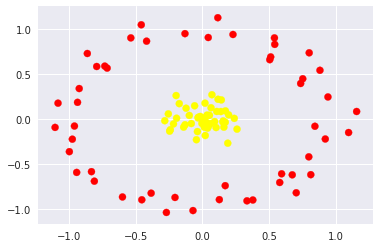

In [13]:
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')
plt.scatter(clf.support_vectors_[:,0],clf.support_vectors_[:,1],s=300,lw=1,facecolors='none')

In [12]:
clf.support_vectors_

array([[ 0.73708607,  0.39554698],
       [-0.71376306,  0.56677833],
       [ 0.5055978 ,  0.66035763],
       [-0.9588339 , -0.077898  ],
       [ 0.84408365, -0.08033359],
       [ 0.17152079, -0.74094293],
       [ 0.19077368, -0.2684947 ]])

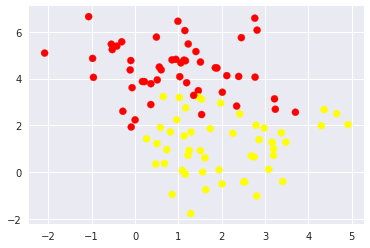

In [15]:
from sklearn.datasets.samples_generator import make_blobs
X,y = make_blobs(n_samples=100,centers=2,random_state=0,cluster_std=1.2)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')

In [1]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [4]:
from sklearn.decomposition import RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150,whiten=True,random_state=42)
svc = SVC(kernel='rbf',class_weight='balanced')
model = make_pipeline(pca,svc)

/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


In [22]:
from sklearn.cross_validation import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(faces.data,faces.target,random_state=42)

In [29]:
from sklearn.grid_search import GridSearchCV
param_grid = {'svc_c':[1,5,10,50], 
              'svc_gamma':[0.0001,0.0005,0.001,0.005]}


In [30]:
grid = GridSearchCV(model,param_grid)


In [31]:
grid.fit(Xtrain,ytrain)

ValueError: Invalid parameter svc_gamma for estimator Pipeline(memory=None,
     steps=[('randomizedpca', RandomizedPCA(copy=True, iterated_power=2, n_components=150, random_state=42,
       whiten=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]). Check the list of available parameters with `estimator.get_params().keys()`.